In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [116]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

변수 설명
Age: 직원의 나이  
Attrition: 퇴사 여부 (Yes/No)  
BusinessTravel: 출장 빈도 (Rarely, Frequently, Non-Travel)  
DailyRate: 하루 급여  
Department: 소속 부서 (Sales, Research & Development, Human Resources)  
DistanceFromHome: 집에서 회사까지의 거리  
Education: 교육 수준 (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')  
EducationField: 전공 분야 (Life Sciences, Other, Medical, Marketing 등)  
EmployeeCount: 직원 수 (모두 1로 설정된 상수)  
EmployeeNumber: 직원 고유 번호  
EnvironmentSatisfaction: 근무 환경 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
Gender: 성별 (Male/Female)  
HourlyRate: 시간당 급여  
JobInvolvement: 직무 몰입도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
JobLevel: 직급 수준  
JobRole: 직무 역할 (Sales Executive, Research Scientist 등)  
JobSatisfaction: 직무 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
MaritalStatus: 결혼 상태 (Single, Married, Divorced)  
MonthlyIncome: 월급  
MonthlyRate: 월간 기본 급여율  
NumCompaniesWorked: 이전에 근무했던 회사 수  
Over18: 성인 여부 (모두 "Y")  
OverTime: 초과 근무 여부 (Yes/No)  
PercentSalaryHike: 연봉 인상률 (지난 연봉 대비 백분율)  
PerformanceRating: 성과 등급 (1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding')  
RelationshipSatisfaction: 인간관계 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High' )  
StandardHours: 표준 근무 시간 (모두 80으로 설정된 상수)  
StockOptionLevel: 주식 옵션 수준 (0~3으로 측정)  
TotalWorkingYears: 총 경력 연수  
TrainingTimesLastYear: 지난 1년간 교육받은 횟수  
WorkLifeBalance: 일과 삶의 균형 (1 'Bad' 2 'Good' 3 'Better' 4 'Best' )  
YearsAtCompany: 회사에서 근무한 연수  
YearsInCurrentRole: 현재 직무에서 근무한 연수  
YearsSinceLastPromotion: 마지막 승진 이후 지난 연수  
YearsWithCurrManager: 현재 관리자가 부임한 이후 함께한 연수  

값이 일정한 변수, 즉 고유값이 1인 변수들은 모델 학습에 의미가 없으므로 제거 필요

또한 직원 고유 번호 변수도 의미가 없으므로 제거

-----

## 데이터 정제 및 전처리

In [117]:
# 변수들의 고유값이 1, 즉 하나의 값만을 가진 변수들은 제거
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'])

In [118]:
# 변수들의 고유값을 파악함으로써 이상치가 있는지 간략하게 확인
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [119]:
# 전체적인 데이터 분포 파악
df.describe().transpose

<bound method DataFrame.transpose of                Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     

In [120]:
# 데이터 분포 파악 - 범주형 변수들의 이상치 확인
categorical_columns=["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus","OverTime"] # 범주형 변수 목록
for col in categorical_columns:
    print(df[col].value_counts())
    print("-"*40 )

Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Rese

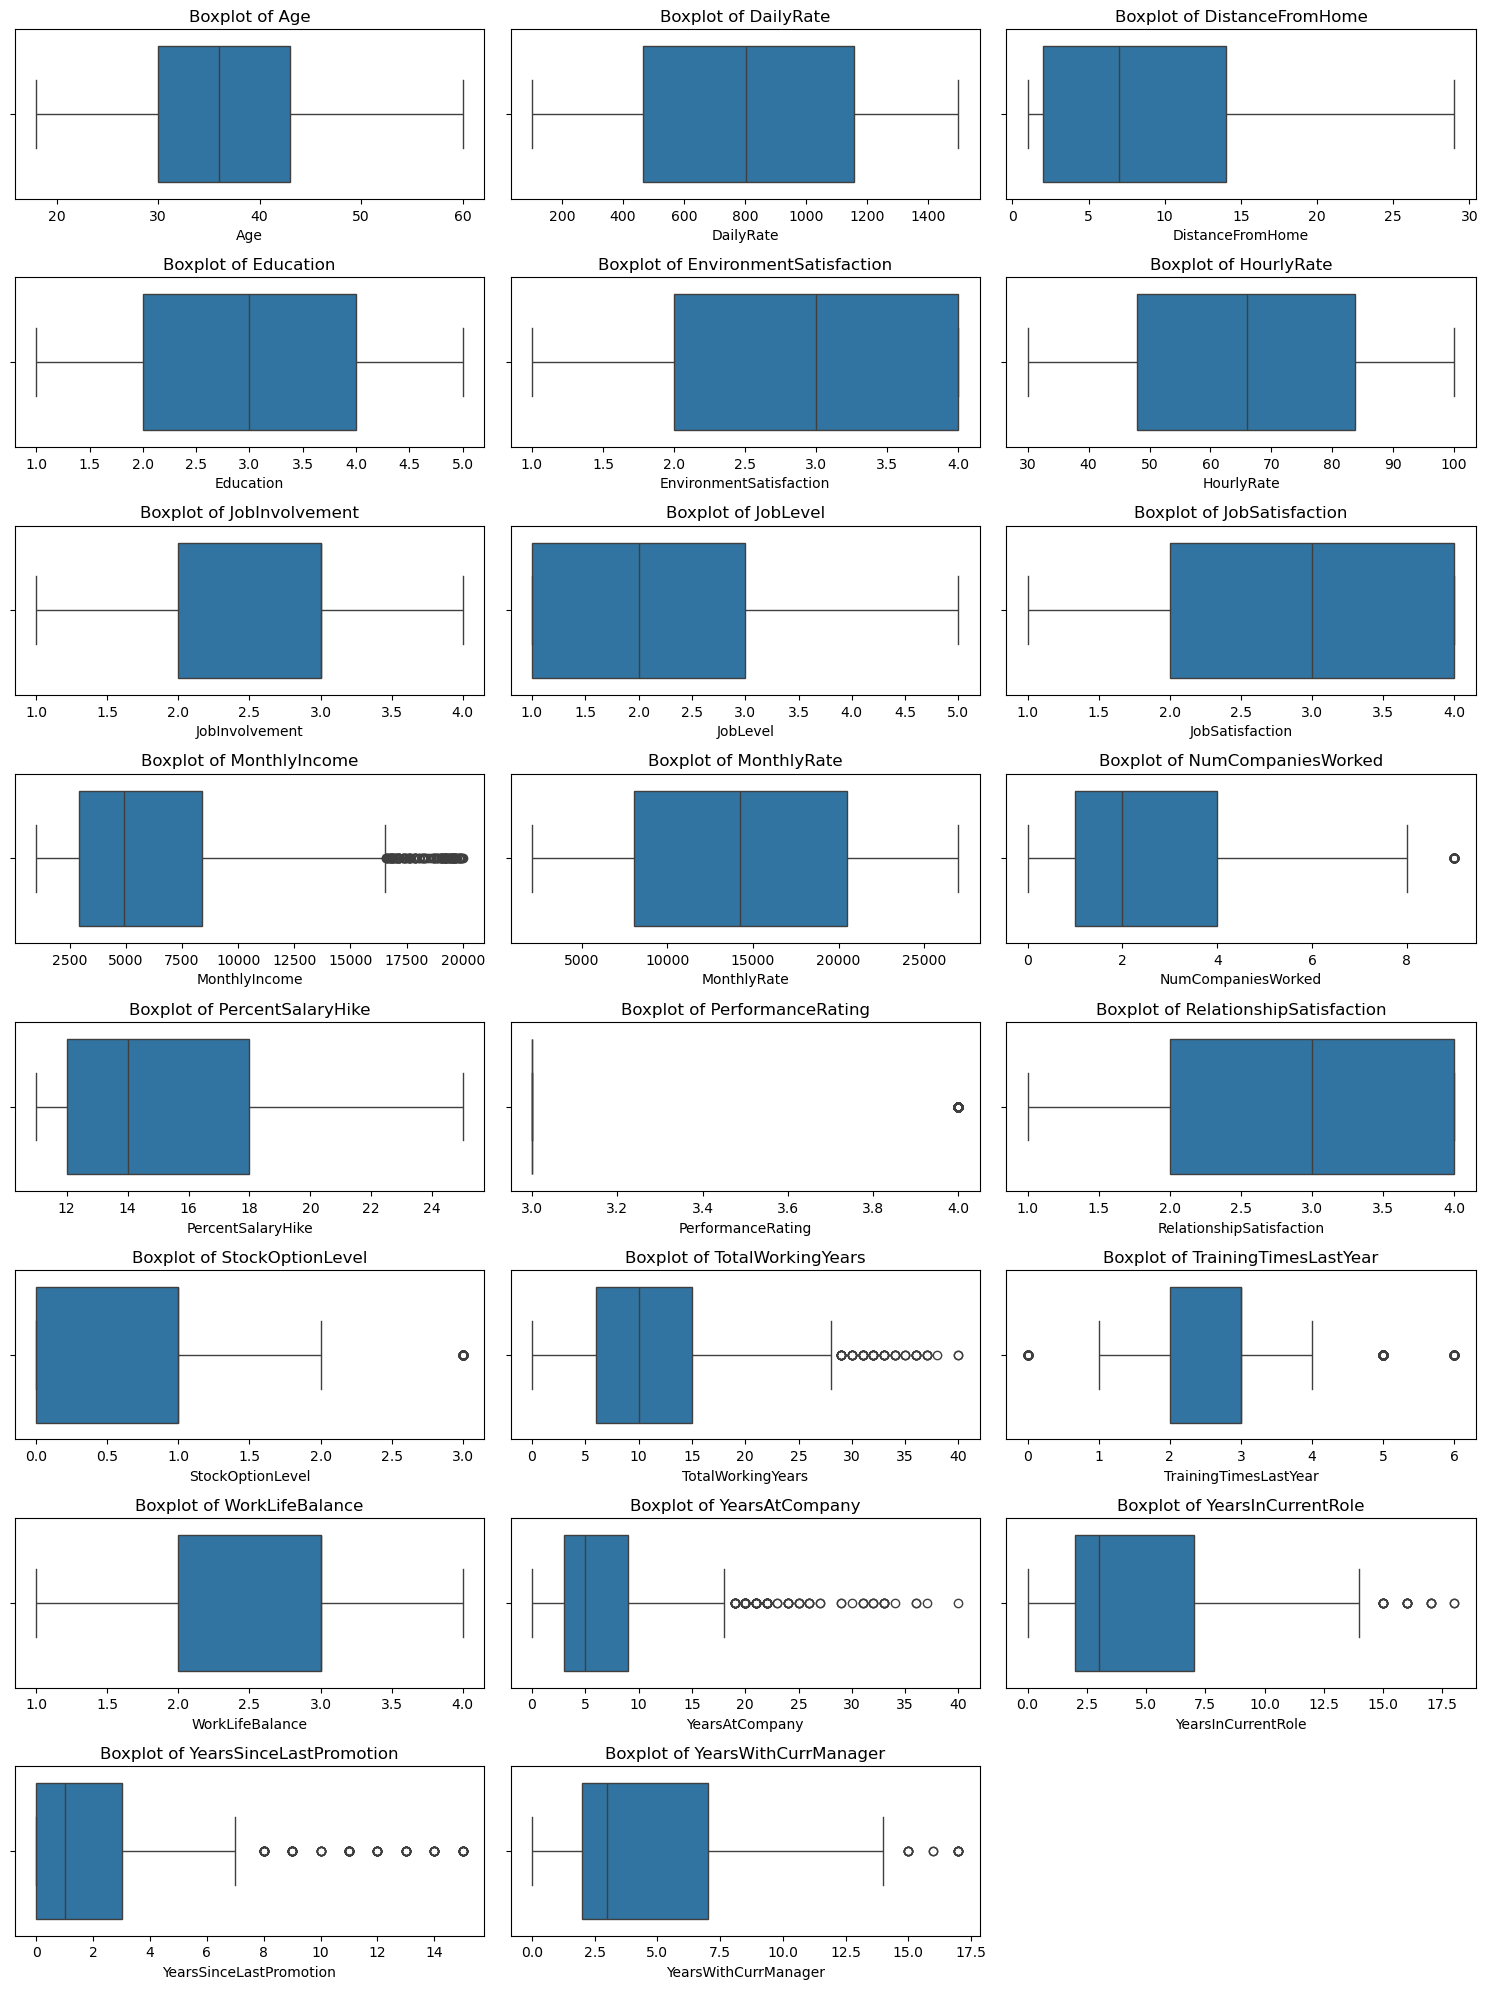

In [121]:
# 데이터 분포 파악 - 숫자형 변수들의 이상치 파악을 위한 박스플롯
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 리스트
exclude_col = ["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# 나머지 변수들만
numeric_col = [col for col in df.columns if col not in exclude_col]

# 각 변수에 대한 박스플롯 그리기
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(len(numeric_col)//3 + 1, 3, i) 
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

해당 박스플롯 확인 결과  
'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',  
'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',  
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'  
이 변수들의 이상치를 제거해야함.

In [122]:
# 숫자형 변수 이상치 제거
outlier_col = [
    'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# IQR 방법을 사용하여 이상치 제거
for col in outlier_col:
    Q1 = df[col].quantile(0.25)  # 1사분위수
    Q3 = df[col].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1                # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한
    # 범위를 벗어나는 값은 이상치로 간주하고 제거
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


범주형 변수들이 문자열로 구성되어 있으므로, 숫자로 바꾸어 분석에 사용해야함.

In [123]:
# 범주가 두 개인 변수들은 맵핑 이용#1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Attrition']

2       1
3       0
5       0
11      0
12      0
       ..
1463    0
1464    0
1465    0
1468    0
1469    0
Name: Attrition, Length: 699, dtype: int64

In [124]:
# 범주가 두 개인 변수들은 맵핑 이용#2
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['OverTime']

2       1
3       1
5       0
11      1
12      0
       ..
1463    0
1464    0
1465    0
1468    0
1469    0
Name: OverTime, Length: 699, dtype: int64

In [125]:
# 범주형 변수들의 변환
df1 = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

In [126]:
# 결측치 확인
print(df1.isna().sum())

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [127]:
# 중복 데이터 확인
duplicates = df1[df1.duplicated()]  
print("중복 있음:", len(duplicates) != 0)

중복 있음: False


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 2 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                699 non-null    int64
 1   Attrition                          699 non-null    int64
 2   DailyRate                          699 non-null    int64
 3   DistanceFromHome                   699 non-null    int64
 4   Education                          699 non-null    int64
 5   EnvironmentSatisfaction            699 non-null    int64
 6   Gender                             699 non-null    int64
 7   HourlyRate                         699 non-null    int64
 8   JobInvolvement                     699 non-null    int64
 9   JobLevel                           699 non-null    int64
 10  JobSatisfaction                    699 non-null    int64
 11  MonthlyIncome                      699 non-null    int64
 12  MonthlyRate               

In [129]:
# 숫자형 변수들에 대해 데이터 스케일링 진행
scaler = StandardScaler()
df1[numeric_col] = scaler.fit_transform(df[numeric_col])
df1.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2,0.249333,1,1.417611,-0.902656,-0.836379,1.171468,1,1.274549,-1.028080,-0.960599,...,False,True,False,False,False,False,False,False,False,True
3,-0.224586,0,1.465259,-0.780141,1.099478,1.171468,0,-0.486336,0.378237,-0.960599,...,False,False,False,False,False,True,False,False,True,False
5,-0.343066,0,0.494759,-0.902656,-0.836379,1.171468,1,0.638674,0.378237,-0.960599,...,False,True,False,False,False,False,False,False,False,True


In [130]:
X = df1.drop(columns=['Attrition'])  # 종속 변수 'Attrition'을 제외하고 독립 변수만 선택
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)  # bool 타입을 int로 변환
X = X.apply(pd.to_numeric, errors='coerce')  # 모든 값을 숫자형으로 변환하며 변환할 수 없는 값은 NaN으로 설정
X = X.dropna(axis=1, how='any')  # NaN이 포함된 열을 제거

y = df1['Attrition']  # 종속 변수


In [131]:
# 다중공선성 파악
# VIF계산
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# VIF 값 계산 및 출력
vif_df = calculate_vif(X)
print(vif_df)

                             variable         VIF
0                                 Age    1.699571
1                           DailyRate    1.073417
2                    DistanceFromHome    1.074924
3                           Education    1.155876
4             EnvironmentSatisfaction    1.079725
5                              Gender    1.068290
6                          HourlyRate    1.048575
7                      JobInvolvement    1.064756
8                            JobLevel    6.509323
9                     JobSatisfaction    1.074029
10                      MonthlyIncome    6.302320
11                        MonthlyRate    1.051188
12                 NumCompaniesWorked    1.404976
13                           OverTime    1.073762
14                  PercentSalaryHike    1.095148
15                  PerformanceRating         NaN
16           RelationshipSatisfaction    1.061856
17                   StockOptionLevel    2.357309
18                  TotalWorkingYears    2.843335


c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF가 10이상인 변수들은 다중공선성 문제가 의심되므로 제거

In [132]:
# VIF가 NaN이거나 특정 기준 이상인 변수 제거 반복
def remove_high_vif_columns(X, threshold=10):
    while True:
        vif_df = calculate_vif(X)
        
        # VIF가 NaN이거나 기준 이상인 변수 확인
        high_vif = vif_df[(vif_df['VIF'].isna()) | (vif_df['VIF'] >= threshold)]
        
        # 기준에 해당하는 변수가 없으면 반복 종료
        if high_vif.empty:
            break
        
        # 제거할 변수 선택 (VIF가 가장 높은 변수)
        remove_column = high_vif.sort_values('VIF', ascending=False).iloc[0]['variable']
        print(f"Removing {remove_column} with VIF {high_vif.iloc[0]['VIF']}")
        X = X.drop(columns=[remove_column])
    
    return X

# VIF가 NaN이거나 10 이상인 변수 제거 후 남은 변수들
X_cleaned = remove_high_vif_columns(X, threshold=10)
print(calculate_vif(X_cleaned))

c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Removing Department_Sales with VIF nan


c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing Department_Research & Development with VIF nan
Removing EducationField_Life Sciences with VIF nan


c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing PerformanceRating with VIF nan
                            variable       VIF
0                                Age  1.685143
1                          DailyRate  1.070466
2                   DistanceFromHome  1.074126
3                          Education  1.154303
4            EnvironmentSatisfaction  1.078981
5                             Gender  2.622372
6                         HourlyRate  1.044099
7                     JobInvolvement  1.063617
8                           JobLevel  6.251496
9                    JobSatisfaction  1.069772
10                     MonthlyIncome  6.293607
11                       MonthlyRate  1.047351
12                NumCompaniesWorked  1.403525
13                          OverTime  1.459052
14                 PercentSalaryHike  1.086341
15          RelationshipSatisfaction  1.056898
16                  StockOptionLevel  2.209215
17                 TotalWorkingYears  2.840996
18             TrainingTimesLastYear  1.068450
19                  

In [133]:
# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X_cleaned)
result = model.fit()

# 결과 출력
print(result.summary())

         Current function value: 0.307174
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  699
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           39
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.3366
Time:                        11:22:42   Log-Likelihood:                -214.71
converged:                      False   LL-Null:                       -323.64
Covariance Type:            nonrobust   LLR p-value:                 1.043e-26
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.3469      0.160     -2.167      0.030      -0.661      -0.033

c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p-value 값이 0.05이상인 변수는 제거

In [134]:
# p-value가 0.05 이상인 변수 제거
while True:
    # p-value가 0.05 이상인 변수 확인
    p_values = result.pvalues
    high_p_value = p_values[p_values > 0.05]
    
    # 기각할 변수가 없으면 종료
    if high_p_value.empty:
        break
    
    # p-value가 가장 높은 변수 제거
    remove_column = high_p_value.idxmax()  # 가장 높은 p-value 변수 선택
    
    
    # 해당 변수 제거
    X_cleaned = X_cleaned.drop(columns=[remove_column])
    
    # 모델 재학습
    model = sm.Logit(y, X_cleaned)
    result = model.fit()

# 최종 결과 출력
print("최종 회귀 결과:")
print(result.summary())

         Current function value: 0.307324
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.308209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308218
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308246
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308409
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308519
         Iterations 8


c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.309035
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309799
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312280
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313990
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314962
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315946
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316867
  

![대체 텍스트](aa.png)  
통계적으로 유의미한 변수들만 남긴 결과 위의 결과를 토대로 퇴사 확률에 가장 많은 영향을 미치는 변수는 MaritalStatus_Single이며,  
Age (-0.3031): 나이가 1세 증가할 때, Attrition 확률이 약 30.31% 감소. 즉, 나이가 많은 직원이 퇴사할 가능성이 적다는 것을 의미  
DistanceFromHome (0.4190): 집에서 직장까지의 거리가 1단위(예: 1마일) 증가할 때 Attrition 확률이 약 41.90% 증가. 이는 거리 증가가 퇴사 가능성을 높이는 요인임을 나타냄.  
EnvironmentSatisfaction (-0.4535): 환경 만족도가 1단계 증가할 때 Attrition 확률이 약 45.35% 감소. 즉, 근무 환경에 대한 만족도가 높을수록 퇴사가능성이 낮아짐.  
JobInvolvement (-0.3556): 직무 몰입도가 1단계 증가할 때 Attrition 확률이 약 35.56% 감소. 직무에 몰입한 직원은 퇴사할 가능성이 적어짐.  
JobSatisfaction (-0.5152): 직무 만족도가 1단계 증가할 때 Attrition 확률이 약 51.52% 감소. 직무에 대한 만족도가 높을수록 퇴사 가능성이 낮아진다는 것을 나타냅니다.  
MonthlyIncome (-0.5812): 월급이 1단위 증가할 때 Attrition 확률이 약 58.12% 감소. 더 높은 소득을 받는 직원이 퇴사할 가능성이 적다는 것을 의미.  
NumCompaniesWorked (0.4268): 이전에 근무했던 회사 수가 1개 증가할 때 Attrition 확률이 약 42.68% 증가. 이전에 여러 회사를 다닌 경험이 있는 직원이 퇴사할 가능성이 높음.  
OverTime (1.4708): 초과 근무를 하는 경우(1로 표시될 때) Attrition 확률이 약 147.08% 증가. 초과 근무가 많은 직원이 퇴사할 가능성이 높음을 나타냄.  
RelationshipSatisfaction (-0.3107): 관계 만족도가 1단계 증가할 때 Attrition 확률이 약 31.07% 감소. 대인 관계에 대한 만족도가 높을수록 퇴사 가능성이 낮음.  
StockOptionLevel (-1.1637): 주식 옵션 수준이 1단계 증가할 때 Attrition 확률이 약 116.37% 감소. 주식 옵션의 제공이 퇴사 가능성을 줄이는 요인으로 작용.  
TotalWorkingYears (-0.5090): 총 근무 년수가 1년 증가할 때 Attrition 확률이 약 50.90% 감소. 경력이 많은 직원이 퇴사할 가능성이 낮다는 것을 나타냄.  
WorkLifeBalance (-0.3193): 직장과 개인 생활의 균형 점수가 1단계 증가할 때 Attrition 확률이 약 31.93% 감소. 더 나은 일과 삶의 균형을 유지하는 직원이 퇴사할 가능성이 낮음.  
YearsInCurrentRole (-0.3529): 현재 역할에서의 경력이 1년 증가할 때 Attrition 확률이 약 35.29% 감소. 현재 직무에서 오래 일한 직원이 퇴사할 가능성이 낮음.  
BusinessTravel_Travel_Rarely (-1.1550): 드물게 출장하는 경우 Attrition 확률이 약 115.50% 감소. 출장 빈도가 낮은 직원이 퇴사할 가능성이 적음.  
EducationField_Medical (-0.7379): 의학 분야에서 일하는 경우 Attrition 확률이 약 73.79% 감소. 의학 분야 종사자가 퇴사할 가능성이 낮다는 것을 나타냄.  
EducationField_Other (-1.0639): 기타 분야에서 일하는 경우 Attrition 확률이 약 106.39% 감소. 기타 분야에서 일하는 직원이 퇴사할 가능성이 적음.  
JobRole_Research Scientist (-1.5604): 연구 과학자 직무를 가진 경우 Attrition 확률이 약 156.04% 감소. 이 직무에서 근무하는 직원의 퇴사 가능성이 낮음.  
MaritalStatus_Married (-1.6492): 기혼 상태인 경우 Attrition 확률이 약 164.92% 감소. 기혼 직원의 퇴사 가능성이 낮다는 것을 나타냄.  
MaritalStatus_Single (-1.7412): 독신 상태인 경우 Attrition 확률이 약 174.12% 감소. 독신 직원의 퇴사 가능성이 낮음.  

통계적으로 유의하지 않은 변수들은 제거하고 모델을 구축하여 성능을 평가해보고, 제거하지 않은 변수들을 가지고 만든 모델과 성능을 비교해볼 것임.
이때, 클래스의 비율이 1:1이 아닌 불균형인 형태이므로 손실함수에 가중치를 주어서 모델을 만들 것 임.  

----

## 로지스틱 회귀 모델 구축

In [135]:
# 변수를 제거한 로지스틱 회귀 모델 구축
# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       178
           1       0.32      0.66      0.43        32

    accuracy                           0.73       210
   macro avg       0.62      0.70      0.63       210
weighted avg       0.83      0.73      0.77       210



In [136]:
# 변수를 제거하지 않은 로지스틱 회귀 모델 구축
# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       178
           1       0.31      0.62      0.42        32

    accuracy                           0.73       210
   macro avg       0.62      0.69      0.62       210
weighted avg       0.83      0.73      0.76       210



두 모델 다 정확도는 비슷하나, 클래스 1에 대한 정밀도와 재현율에서 약간의 차이를 보인다.
변수를 제거한 모델이 조금 더 좋은 성능을 보인다.